# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Generate Cities List

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from citipy import citipy
from api_keys import api_key

In [1]:
# Creating an empty dataframe with 4 columns
citycountry_df = pd.DataFrame(columns = ["Latitude", "Longitude", "City", "Country"])


# Finding the city and the country code corresponding to the Latitude and Longitude
indx = 0
while citycountry_df.shape[0] < 500:
    lats = np.random.uniform(low=-90.000, high=90.000)
    lngs = np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lats, lngs)
    
    if city.city_name not in citycountry_df['City']:
        citycountry_df.loc[indx, 'Latitude'] = lats
        citycountry_df.loc[indx, 'Longitude'] = lngs
        citycountry_df.loc[indx, "City"] = city.city_name
        citycountry_df.loc[indx, "Country"] = city.country_code
        indx += 1
    
citycountry_df.head()

,Latitude,Longitude,City,Country
0,28.8988,-146.286,hilo,us
1,87.6211,-158.885,barrow,us
2,-69.3878,-7.60145,cape town,za
3,-62.643,-22.478,chuy,uy
4,-14.991,17.955,menongue,ao


In [4]:
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q={0}"

In [5]:
citycountry_df['Temp'] = np.nan
citycountry_df['Humidity'] = np.nan
citycountry_df['Wind'] = np.nan
citycountry_df['Clouds'] = np.nan

In [6]:
for i in range(citycountry_df.shape[0]):
    res = requests.get(url.format(citycountry_df.loc[i,'City']))
    print("Found city  " + str(i))
    print("The name of the city is " + citycountry_df.loc[i,'City'])
    if res.status_code == 200:
        info = res.json()
        citycountry_df.loc[i,'Temp'] = info['main']['temp']
        citycountry_df.loc[i,'Humidity'] = info['main']['humidity']
        citycountry_df.loc[i,'Wind'] = info['wind']['speed']
        citycountry_df.loc[i,'Clouds'] = info['clouds']['all']
    else:
        print('City not found')  
    print("_____________________________________________________________________________________")

We are now on city number 0
The name of the city is hilo
_____________________________________________________________________________________
We are now on city number 1
The name of the city is barrow
_____________________________________________________________________________________
We are now on city number 2
The name of the city is cape town
_____________________________________________________________________________________
We are now on city number 3
The name of the city is chuy
_____________________________________________________________________________________
We are now on city number 4
The name of the city is menongue
_____________________________________________________________________________________
We are now on city number 5
The name of the city is ozernovskiy
_____________________________________________________________________________________
We are now on city number 6
The name of the city is buraydah
_______________________________________________________________

We are now on city number 55
The name of the city is lagoa
_____________________________________________________________________________________
We are now on city number 56
The name of the city is vila franca do campo
_____________________________________________________________________________________
We are now on city number 57
The name of the city is sambava
_____________________________________________________________________________________
We are now on city number 58
The name of the city is lompoc
_____________________________________________________________________________________
We are now on city number 59
The name of the city is cape town
_____________________________________________________________________________________
We are now on city number 60
The name of the city is sentyabrskiy
City not found
_____________________________________________________________________________________
We are now on city number 61
The name of the city is luderitz
________________________

City not found
_____________________________________________________________________________________
We are now on city number 112
The name of the city is kodiak
_____________________________________________________________________________________
We are now on city number 113
The name of the city is hermanus
_____________________________________________________________________________________
We are now on city number 114
The name of the city is necochea
_____________________________________________________________________________________
We are now on city number 115
The name of the city is grand river south east
City not found
_____________________________________________________________________________________
We are now on city number 116
The name of the city is ngukurr
City not found
_____________________________________________________________________________________
We are now on city number 117
The name of the city is new norfolk
_______________________________________________

We are now on city number 166
The name of the city is khani
_____________________________________________________________________________________
We are now on city number 167
The name of the city is ushuaia
_____________________________________________________________________________________
We are now on city number 168
The name of the city is barrow
_____________________________________________________________________________________
We are now on city number 169
The name of the city is rikitea
_____________________________________________________________________________________
We are now on city number 170
The name of the city is nikolskoye
_____________________________________________________________________________________
We are now on city number 171
The name of the city is taolanaro
City not found
_____________________________________________________________________________________
We are now on city number 172
The name of the city is busselton
_______________________________

We are now on city number 221
The name of the city is hamilton
_____________________________________________________________________________________
We are now on city number 222
The name of the city is ushuaia
_____________________________________________________________________________________
We are now on city number 223
The name of the city is port alfred
_____________________________________________________________________________________
We are now on city number 224
The name of the city is rikitea
_____________________________________________________________________________________
We are now on city number 225
The name of the city is tasiilaq
_____________________________________________________________________________________
We are now on city number 226
The name of the city is busselton
_____________________________________________________________________________________
We are now on city number 227
The name of the city is dikson
___________________________________________

We are now on city number 276
The name of the city is port alfred
_____________________________________________________________________________________
We are now on city number 277
The name of the city is lebu
_____________________________________________________________________________________
We are now on city number 278
The name of the city is bluff
_____________________________________________________________________________________
We are now on city number 279
The name of the city is nikolskoye
_____________________________________________________________________________________
We are now on city number 280
The name of the city is busselton
_____________________________________________________________________________________
We are now on city number 281
The name of the city is atyrau
_____________________________________________________________________________________
We are now on city number 282
The name of the city is palu
__________________________________________________

We are now on city number 331
The name of the city is tura
_____________________________________________________________________________________
We are now on city number 332
The name of the city is east london
_____________________________________________________________________________________
We are now on city number 333
The name of the city is marcona
City not found
_____________________________________________________________________________________
We are now on city number 334
The name of the city is avarua
_____________________________________________________________________________________
We are now on city number 335
The name of the city is chokurdakh
_____________________________________________________________________________________
We are now on city number 336
The name of the city is tazmalt
_____________________________________________________________________________________
We are now on city number 337
The name of the city is albany
_________________________________

_____________________________________________________________________________________
We are now on city number 386
The name of the city is atuona
_____________________________________________________________________________________
We are now on city number 387
The name of the city is itarema
_____________________________________________________________________________________
We are now on city number 388
The name of the city is lucapa
_____________________________________________________________________________________
We are now on city number 389
The name of the city is grand gaube
_____________________________________________________________________________________
We are now on city number 390
The name of the city is kamenka
_____________________________________________________________________________________
We are now on city number 391
The name of the city is bredasdorp
_____________________________________________________________________________________
We are now on city nu

SSLError: HTTPSConnectionPool(host='api.openweathermap.org', port=443): Max retries exceeded with url: /data/2.5/weather?appid=ecaebb176b4d98e943a640d42b371906&units=imperial&q=axim (Caused by SSLError(SSLError("bad handshake: SysCallError(-1, 'Unexpected EOF')")))

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
citycountry_df

,Latitude,Longitude,City,Country,Temp,Humidity,Wind,Clouds
0,28.8988,-146.286,hilo,us,72.99,69.0,8.05,90.0
1,87.6211,-158.885,barrow,us,60.60,51.0,12.77,0.0
2,-69.3878,-7.60145,cape town,za,60.96,82.0,9.17,0.0
3,-62.643,-22.478,chuy,uy,62.04,91.0,4.61,88.0
4,-14.991,17.955,menongue,ao,62.85,89.0,2.37,36.0
5,51.4819,157.095,ozernovskiy,ru,35.04,83.0,17.69,36.0
6,27.9226,42.0866,buraydah,sa,66.20,82.0,9.17,20.0
7,84.2005,51.7456,belushya guba,ru,NaN,NaN,NaN,NaN
8,18.8487,161.523,butaritari,ki,79.77,100.0,8.41,92.0
9,-53.3413,-87.6001,punta arenas,cl,44.29,75.0,39.15,75.0


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [21]:
citycountry_df['Latitude'] = citycountry_df['Latitude'].astype(float)
citycountry_df['Longitude'] = citycountry_df['Longitude'].astype(float)

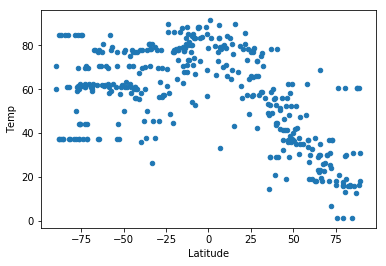

In [22]:
citycountry_df.plot.scatter(x='Latitude', y='Temp')

plt.savefig('output_data/lat_temp.png')

#### Latitude vs. Humidity Plot

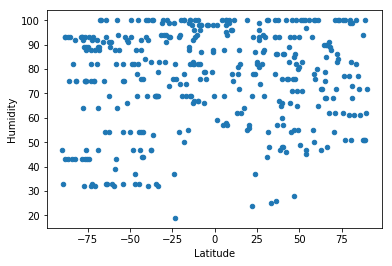

In [23]:
citycountry_df.plot.scatter(x='Latitude', y='Humidity')

plt.savefig('output_data/lat_humidity.png')

#### Latitude vs. Cloudiness Plot

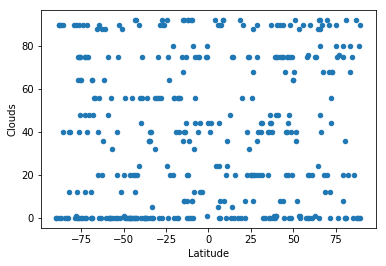

In [24]:
citycountry_df.plot.scatter(x='Latitude', y='Clouds')

plt.savefig('output_data/lat_clouds.png')

#### Latitude vs. Wind Speed Plot

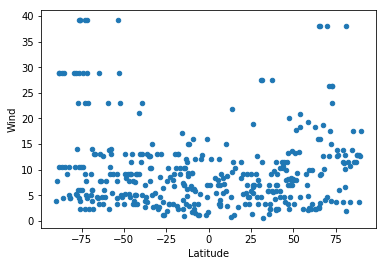

In [25]:
citycountry_df.plot.scatter(x='Latitude', y='Wind')
plt.savefig('output_data/lat_wind.png')

In [ ]:
citycountry_df.to_csv(output_data_file, index=False)

In [ ]:
os.listdir('./output_data')